In [1]:
# from google.colab import drive

# drive.mount('/content/gdrive')
# root_path = '/D/Flatiron/Mod_5/Capstone'  #change dir to your project folder

In [2]:
# pip install pandas_datareader

In [3]:
# pip install tensorflow --user

In [4]:
# pip uninstall keras

In [5]:
# pip install keras --upgrade

In [6]:
import sys

In [7]:
sys.executable

'C:\\Users\\eduar\\anaconda3\\envs\\learn-env\\python.exe'

In [8]:
#import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
from keras import regularizers
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
import talos
import matplotlib.pyplot as plt

import praw
from psaw import PushshiftAPI
import config
import pandas as pd

import nltk
from nltk.corpus import stopwords
import string
from  nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.collocations import *
# nltk.download('wordnet')
from nltk import word_tokenize, FreqDist

from spacy import displacy
import spacy
from tqdm import tqdm

tqdm.pandas()
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

import plotly.graph_objects as go
import plotly.express as px

import twint
import pandas as pd

import nest_asyncio 
nest_asyncio.apply()

from dateutil import rrule
import datetime as datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import time
start_time = time.time()

Using TensorFlow backend.


## Inputs:

In [9]:
currentDate = datetime.datetime.now()
ticker = 'TSLA'#ticker symbol
sub = 'wallstreetbets' #Subreddit

In [10]:
currentDate.date()

datetime.date(2021, 6, 15)

In [11]:
r = praw.Reddit(
    client_id=config.reddit['client_id'],
    client_secret=config.reddit['client_secret'],
    username=config.reddit['username'],
    password=config.reddit['password'],
    user_agent='test'
)
api = PushshiftAPI(r)

## Webscraping:

In [12]:
def populate(currentDate, ticker, subreddit, limit):
#Reddit Posts    
    Dates = []
    gen = []

    for i in range(24):#Number of months
        Dates.append((currentDate - relativedelta(months=i)).date())
    
    for i in range(len(Dates)-1):

        
        gen.extend(list(api.search_submissions(after=Dates[i+1],
                            before=Dates[i],
                            q=ticker, 
                            subreddit='wallstreetbets',
                            filter=['created', 'title'],
                            check_for_async=False,
                            limit=limit)))
    
#Turning gen list into a pandas dataframe    
    j = []

    for i in gen:
        j.append([i.title, 
#               i.author, 
#                   i.subreddit, 
#               i.score, 
                datetime.datetime.fromtimestamp(
                int(round(i.created))
                ).strftime('%Y-%m-%d')])#Returns the time the post was created in regular time instead of UNIX time])
        
    red_posts = pd.DataFrame(j,columns=['post', 
#                                 'author', 
#                                 'subreddit', 
#                                 'score', 
                                'date'])
    
    
#Tweets dataframe
    
    c = twint.Config()

    c.Search =ticker #search must contain ""
    c.Min_likes = 1000 #min number of likes
    c.Until = str(currentDate.date()) #return tweets that were published before this date
    c.Since = str((currentDate - relativedelta(months=24)).date()) #return tweets published after this day(Months)
    c.Count = True
    c.Limit = 15000 # Limits the tweets to this number
    # c.Format = "Tweet id: {id} | Date: {date} | Username: {username} | Tweet: {tweet} | Mention: {mention}"
    c.Store_csv = True
    c.Output = 'Post.csv'
    
    twint.run.Search(c)
    
    tweets = pd.read_csv('Post.csv')
    tweets = tweets.rename(columns={"tweet": "post"})

    
    tweets = pd.concat([tweets['date'], tweets['post']], axis=1)
    
    
#combining reddit post and tweets    
    posts = pd.concat([red_posts, tweets])
    
    return posts
    

In [13]:
posts= populate(currentDate, ticker, sub, 300)

1404016040678498311 2021-06-13 05:01:24 -0500 <bevedoni> This guy makes cars. If you drive one, you will fall in love. Not only with the car, but with him and his world.   I have warned you.  $TSLA  https://t.co/vaQcPwetWT
1403756496257798145 2021-06-12 11:50:03 -0500 <sspencer_smb> Tesla invasion on the block... $TSLA  https://t.co/0OA7SIgDnI
1403704422253748224 2021-06-12 08:23:08 -0500 <GerberKawasaki> We all know who buys the most ads on cable TV. Tesla spends zero on advertising and is sold out of cars... $TSLA
1403528162265477121 2021-06-11 20:42:44 -0500 <TeslaNY> Jay Leno drives new @Tesla Model S Plaid: “It is now the fastest production car you can buy, faster than any Ferrari, faster than any $3.5 million Bugatti!” $TSLA #Tesla #EV @elonmusk  https://t.co/WJz5ElALh4
1403327331192606723 2021-06-11 07:24:42 -0500 <GerberKawasaki> Elon said many times. The car will learn your behavior and driving style… this is the first AI car. #TeslaModelSPlaid $tsla
1403304658874023939 2021-0

1377985097626918914 2021-04-02 09:03:43 -0500 <GerberKawasaki> Haha. Tesla blows out production and delivery numbers. Looking at 180k produced and 184k delivered. Massively beating all our conservative estimates. $tsla
1377965584021852166 2021-04-02 07:46:11 -0500 <TeslaPodcast> Tesla crushes delivery expectations by delivering 184,800 vehicles in Q1, ahead of consensus of 172,230, while producing 180,338. $TSLA  https://t.co/WRNnv6rkDl
1377953104407183361 2021-04-02 06:56:35 -0500 <BrianFeroldi> .@elonmusk now has 50,000,000 Twitter followers  His influence only multiplies from there when it's covered by blogs, youtube, and a bazillion other media outlets  That gives $TSLA access to unlimited, zero-cost marketing  IMO, this is a massive, underrated advantage
1377441543099846656 2021-03-31 21:03:50 -0500 <SawyerMerritt> BREAKING: Apple to use Tesla batteries at California solar farm. $TSLA  The setup, which will store up to 240 megawatt-hours of energy. It will consist of 85 Tesla lith

1344764784839962629 2020-12-31 15:58:03 -0500 <charliebilello> 2020 Returns... Tesla $TSLA: +743% Peloton $PTON: +434% Moderna $MRNA: +434% Zoom $ZM: +396% Bitcoin: +304% $AAPL: +82% $AMZN: +76% Nasdaq 100 $QQQ: +49% $MSFT: +43% $GOOGL: +31% Gold: +24% Small Caps $IWM: +20% S&amp;P $SPY: +18% LT Treasuries $TLT: +18% Bonds $AGG: +7% Oil: -21%
1344751212189675521 2020-12-31 15:04:07 -0500 <TeslaPodcast> $TSLA wraps up 2020 with an all-time high closing price of $705.67, finishing up 743% on the year. 🎉
1344703391335735297 2020-12-31 11:54:06 -0500 <sairarahman> Electrician came over today, and asked if we own $TSLA stock and then explained how much money he’s made on it and how he’s saving up for one himself. Also asked me how to buy options.
1344652422635900932 2020-12-31 08:31:34 -0500 <GerberKawasaki> Tesla looking to open over $700! We’ve punished the short sellers, the climate haters, to the tune of $38 bil this year.  The largest short loss in investment history.  Congrats @elonmu

1237459381643382784 2020-03-10 14:24:42 -0500 <vincent13031925> Tesla Topped 1st Place 🏆🥇 in Consumer Reports Owner Satisfaction Survey 👏🏻👏🏻👏🏻  $TSLA #Tesla  @elonmusk @Tesla  https://t.co/0OTGhjQdz3
1226003716152516610 2020-02-07 22:43:58 -0500 <vincent13031925> ⚠️⚠️⚠️Breaking⚠️⚠️⚠️  Shanghai Government Confirmed:  Tesla Gigafactory Shanghai China 🇨🇳 Resume Production Feb 10 ‼️  Congratulation @elonmusk &amp; @Tesla  $TSLA #Tesla #China #GF3 #China   Detail:   https://t.co/7gRd7K8a7E
1225227744306438146 2020-02-05 19:20:32 -0500 <JayWoods3> Actual dinner conversation...  Son (14).. “Dad, can I buy a stock?”  Me.. *Smiles proudly, then thinks a bit more... “Please don’t say $TSLA”  Son.. “How did you know?!! All it does is make money!!”   This is the top...
1225143665267564545 2020-02-05 13:46:26 -0500 <pulte> Many of you are asking me about TESLA $TSLA. Elon has "got it", and that's why I gave away Two Tesla's on the Internet! $TSLA
1224903137124708352 2020-02-04 21:50:40 -0500 <Asenn

In [14]:
posts

post        date
0     TSLA? Does it still have the largest short, in...  2021-06-14
1                              Haha TSLA calls go brrrr  2021-06-14
2                                           #TSLA #CLOV  2021-06-14
3     Tsla right...yeah well don't let this distract...  2021-06-14
4     MARA and TSLA with big gains I also got gains ...  2021-06-14
...                                                 ...         ...
3438  Tesla CEO @elonmusk will attend (WAIC) World A...  2019-08-02
3439  This is still my all time favorite video clip ...  2019-07-14
3440  Mr @JayLeno is a #Tesla owner &amp; likes them...  2019-07-12
3441  Ok, I tried the new game “Beach Buggy Racing 2...  2019-06-18
3442  Love this interview from 2014 showing how Tesl...  2019-06-14

[9395 rows x 2 columns]

In [15]:
boolean = posts.duplicated(subset=['post']).any() 

In [16]:
posts = posts.drop_duplicates(subset=['post'], ignore_index=True)

In [17]:
posts

post        date
0     TSLA? Does it still have the largest short, in...  2021-06-14
1                              Haha TSLA calls go brrrr  2021-06-14
2                                           #TSLA #CLOV  2021-06-14
3     Tsla right...yeah well don't let this distract...  2021-06-14
4     MARA and TSLA with big gains I also got gains ...  2021-06-14
...                                                 ...         ...
8187  Jay Leno drives new @Tesla Model S Plaid: “It ...  2021-06-11
8188  Elon said many times. The car will learn your ...  2021-06-11
8189  $TSLA Plaid faster and cheaper than..  1. 918 ...  2021-06-11
8190  S Plaid event was amazing. Test drive felt lik...  2021-06-11
8191  Test ride in a Plaid Mode Model S. That was in...  2021-06-10

[8192 rows x 2 columns]

## NLP:

In [18]:
nlp.component_names

['tok2vec',
 'tagger',
 'parser',
 'senter',
 'ner',
 'attribute_ruler',
 'lemmatizer',
 'spacytextblob']

In [19]:
posts['spacy'] = posts.post.progress_apply(lambda x: nlp(x))

100%|██████████| 8192/8192 [00:54<00:00, 150.88it/s]


In [20]:
posts['sentiment'] = posts.spacy.progress_apply(lambda x: (x._.polarity))
posts['subjectivity'] = posts.spacy.progress_apply(lambda x: (x._.subjectivity))

100%|██████████| 8192/8192 [00:00<00:00, 250247.54it/s]


In [21]:
fig = px.scatter(posts, x='sentiment', y='subjectivity',
                hover_data=['post'])
fig.show()

In [22]:
posts

post        date  \
0     TSLA? Does it still have the largest short, in...  2021-06-14   
1                              Haha TSLA calls go brrrr  2021-06-14   
2                                           #TSLA #CLOV  2021-06-14   
3     Tsla right...yeah well don't let this distract...  2021-06-14   
4     MARA and TSLA with big gains I also got gains ...  2021-06-14   
...                                                 ...         ...   
8187  Jay Leno drives new @Tesla Model S Plaid: “It ...  2021-06-11   
8188  Elon said many times. The car will learn your ...  2021-06-11   
8189  $TSLA Plaid faster and cheaper than..  1. 918 ...  2021-06-11   
8190  S Plaid event was amazing. Test drive felt lik...  2021-06-11   
8191  Test ride in a Plaid Mode Model S. That was in...  2021-06-10   

                                                  spacy  sentiment  \
0     (TSLA, ?, Does, it, still, have, the, largest,...   0.000000   
1                        (Haha, TSLA, calls, go, brrrr)   0.200000   
2                                    (#, TSLA, #, CLOV)   0.000000   
3     (Tsla, right, ..., yeah, well, do, n't, let, t...   0.136364   
4     (MARA, and, TSLA, with, big, gains, I, also, g...   0.000000   
...                                                 ...        ...   
8187  (Jay, Leno, drives, new, @Tesla, Model, S, Pla...   0.170455   
8188  (Elon, said, many, times, ., The, car, will, l...   0.375000   
8189  ($, TSLA, Plaid, faster, and, cheaper, than, ....   0.000000   
8190  (S, Plaid, event, was, amazing, ., Test, drive...   0.172727   
8191  (Test, ride, in, a, Plaid, Mode, Model, S., Th...   0.225000   

      subjectivity  
0         0.300000  
1         0.300000  
2         0.000000  
3         0.454545  
4         0.100000  
...            ...  
8187      0.454545  
8188      0.416667  
8189      1.000000  
8190      0.613258  
8191      0.600000  

[8192 rows x 5 columns]

In [23]:
final_posts = posts.groupby(['date']).mean().sort_values(by='date', ascending=False)

In [24]:
final_posts

sentiment  subjectivity
date                               
2021-06-14   0.148485      0.217172
2021-06-13   0.062500      0.200000
2021-06-12   0.027937      0.507937
2021-06-11   0.116288      0.334091
2021-06-10  -0.008039      0.218855
...               ...           ...
2018-05-02   0.343750      0.506250
2018-04-30  -0.250000      0.250000
2017-12-21   0.000000      0.000000
2017-11-16   0.153409      0.448864
2017-06-05   0.330000      0.520000

[755 rows x 2 columns]

In [25]:
final_posts.index.names = ['Date']

In [26]:
final_posts

sentiment  subjectivity
Date                               
2021-06-14   0.148485      0.217172
2021-06-13   0.062500      0.200000
2021-06-12   0.027937      0.507937
2021-06-11   0.116288      0.334091
2021-06-10  -0.008039      0.218855
...               ...           ...
2018-05-02   0.343750      0.506250
2018-04-30  -0.250000      0.250000
2017-12-21   0.000000      0.000000
2017-11-16   0.153409      0.448864
2017-06-05   0.330000      0.520000

[755 rows x 2 columns]

In [27]:
from matplotlib.pyplot import figure

In [28]:
#Get the stock quote
tick = web.DataReader(ticker, data_source='yahoo', start=str((currentDate - relativedelta(months=24)).date()), end=str(currentDate.date()))
tick

High         Low        Open       Close      Volume  \
Date                                                                     
2019-06-17   45.400002   42.854000   43.096001   45.006001  61584000.0   
2019-06-18   46.948002   44.512001   45.743999   44.948002  63579000.0   
2019-06-19   45.554001   44.212002   45.021999   45.285999  32875500.0   
2019-06-20   45.380001   43.270000   44.599998   43.924000  59317500.0   
2019-06-21   44.436001   43.099998   43.243999   44.372002  41010500.0   
...                ...         ...         ...         ...         ...   
2021-06-09  611.789978  597.630005  602.169983  598.780029  16584600.0   
2021-06-10  616.590027  600.500000  603.880005  610.119995  23919600.0   
2021-06-11  612.559998  601.520020  610.229980  609.890015  16165000.0   
2021-06-14  625.489990  609.179993  612.229980  617.690002  20391000.0   
2021-06-15  616.789978  598.229980  616.690002  599.359985  17659259.0   

             Adj Close  
Date                    
2019-06-17   45.006001  
2019-06-18   44.948002  
2019-06-19   45.285999  
2019-06-20   43.924000  
2019-06-21   44.372002  
...                ...  
2021-06-09  598.780029  
2021-06-10  610.119995  
2021-06-11  609.890015  
2021-06-14  617.690002  
2021-06-15  599.359985  

[504 rows x 6 columns]

In [29]:
tick.shape

(504, 6)

## Merging Posts:

In [30]:
df= tick.join(final_posts)

In [31]:
#Get number of rows and columns
df.shape

(504, 8)

In [32]:
df

High         Low        Open       Close      Volume  \
Date                                                                     
2019-06-17   45.400002   42.854000   43.096001   45.006001  61584000.0   
2019-06-18   46.948002   44.512001   45.743999   44.948002  63579000.0   
2019-06-19   45.554001   44.212002   45.021999   45.285999  32875500.0   
2019-06-20   45.380001   43.270000   44.599998   43.924000  59317500.0   
2019-06-21   44.436001   43.099998   43.243999   44.372002  41010500.0   
...                ...         ...         ...         ...         ...   
2021-06-09  611.789978  597.630005  602.169983  598.780029  16584600.0   
2021-06-10  616.590027  600.500000  603.880005  610.119995  23919600.0   
2021-06-11  612.559998  601.520020  610.229980  609.890015  16165000.0   
2021-06-14  625.489990  609.179993  612.229980  617.690002  20391000.0   
2021-06-15  616.789978  598.229980  616.690002  599.359985  17659259.0   

             Adj Close  sentiment  subjectivity  
Date                                             
2019-06-17   45.006001        NaN           NaN  
2019-06-18   44.948002   0.202814      0.438745  
2019-06-19   45.285999        NaN           NaN  
2019-06-20   43.924000        NaN           NaN  
2019-06-21   44.372002   0.100000      1.000000  
...                ...        ...           ...  
2021-06-09  598.780029   0.192857      0.276984  
2021-06-10  610.119995  -0.008039      0.218855  
2021-06-11  609.890015   0.116288      0.334091  
2021-06-14  617.690002   0.148485      0.217172  
2021-06-15  599.359985        NaN           NaN  

[504 rows x 8 columns]

In [33]:
#Looking for NaN values
df.isna()

High    Low   Open  Close  Volume  Adj Close  sentiment  \
Date                                                                   
2019-06-17  False  False  False  False   False      False       True   
2019-06-18  False  False  False  False   False      False      False   
2019-06-19  False  False  False  False   False      False       True   
2019-06-20  False  False  False  False   False      False       True   
2019-06-21  False  False  False  False   False      False      False   
...           ...    ...    ...    ...     ...        ...        ...   
2021-06-09  False  False  False  False   False      False      False   
2021-06-10  False  False  False  False   False      False      False   
2021-06-11  False  False  False  False   False      False      False   
2021-06-14  False  False  False  False   False      False      False   
2021-06-15  False  False  False  False   False      False       True   

            subjectivity  
Date                      
2019-06-17          True  
2019-06-18         False  
2019-06-19          True  
2019-06-20          True  
2019-06-21         False  
...                  ...  
2021-06-09         False  
2021-06-10         False  
2021-06-11         False  
2021-06-14         False  
2021-06-15          True  

[504 rows x 8 columns]

In [34]:
#Filled NaN values with the average of the columns
df = df.fillna(df.mean())

In [35]:
df = pd.DataFrame(df)

In [36]:
df['Target'] = np.append(df['Close'].iloc[1:].values, [np.nan])

In [37]:
df

High         Low        Open       Close      Volume  \
Date                                                                     
2019-06-17   45.400002   42.854000   43.096001   45.006001  61584000.0   
2019-06-18   46.948002   44.512001   45.743999   44.948002  63579000.0   
2019-06-19   45.554001   44.212002   45.021999   45.285999  32875500.0   
2019-06-20   45.380001   43.270000   44.599998   43.924000  59317500.0   
2019-06-21   44.436001   43.099998   43.243999   44.372002  41010500.0   
...                ...         ...         ...         ...         ...   
2021-06-09  611.789978  597.630005  602.169983  598.780029  16584600.0   
2021-06-10  616.590027  600.500000  603.880005  610.119995  23919600.0   
2021-06-11  612.559998  601.520020  610.229980  609.890015  16165000.0   
2021-06-14  625.489990  609.179993  612.229980  617.690002  20391000.0   
2021-06-15  616.789978  598.229980  616.690002  599.359985  17659259.0   

             Adj Close  sentiment  subjectivity      Target  
Date                                                         
2019-06-17   45.006001   0.060755      0.292024   44.948002  
2019-06-18   44.948002   0.202814      0.438745   45.285999  
2019-06-19   45.285999   0.060755      0.292024   43.924000  
2019-06-20   43.924000   0.060755      0.292024   44.372002  
2019-06-21   44.372002   0.100000      1.000000   44.728001  
...                ...        ...           ...         ...  
2021-06-09  598.780029   0.192857      0.276984  610.119995  
2021-06-10  610.119995  -0.008039      0.218855  609.890015  
2021-06-11  609.890015   0.116288      0.334091  617.690002  
2021-06-14  617.690002   0.148485      0.217172  599.359985  
2021-06-15  599.359985   0.060755      0.292024         NaN  

[504 rows x 9 columns]

In [38]:
#Dropping todays date
df = df.dropna()

In [39]:
df

High         Low        Open       Close      Volume  \
Date                                                                     
2019-06-17   45.400002   42.854000   43.096001   45.006001  61584000.0   
2019-06-18   46.948002   44.512001   45.743999   44.948002  63579000.0   
2019-06-19   45.554001   44.212002   45.021999   45.285999  32875500.0   
2019-06-20   45.380001   43.270000   44.599998   43.924000  59317500.0   
2019-06-21   44.436001   43.099998   43.243999   44.372002  41010500.0   
...                ...         ...         ...         ...         ...   
2021-06-08  623.090027  595.500000  623.010010  603.590027  26053400.0   
2021-06-09  611.789978  597.630005  602.169983  598.780029  16584600.0   
2021-06-10  616.590027  600.500000  603.880005  610.119995  23919600.0   
2021-06-11  612.559998  601.520020  610.229980  609.890015  16165000.0   
2021-06-14  625.489990  609.179993  612.229980  617.690002  20391000.0   

             Adj Close  sentiment  subjectivity      Target  
Date                                                         
2019-06-17   45.006001   0.060755      0.292024   44.948002  
2019-06-18   44.948002   0.202814      0.438745   45.285999  
2019-06-19   45.285999   0.060755      0.292024   43.924000  
2019-06-20   43.924000   0.060755      0.292024   44.372002  
2019-06-21   44.372002   0.100000      1.000000   44.728001  
...                ...        ...           ...         ...  
2021-06-08  603.590027   0.023268      0.245990  598.780029  
2021-06-09  598.780029   0.192857      0.276984  610.119995  
2021-06-10  610.119995  -0.008039      0.218855  609.890015  
2021-06-11  609.890015   0.116288      0.334091  617.690002  
2021-06-14  617.690002   0.148485      0.217172  599.359985  

[503 rows x 9 columns]

In [40]:
type(df)

pandas.core.frame.DataFrame

In [41]:
df

High         Low        Open       Close      Volume  \
Date                                                                     
2019-06-17   45.400002   42.854000   43.096001   45.006001  61584000.0   
2019-06-18   46.948002   44.512001   45.743999   44.948002  63579000.0   
2019-06-19   45.554001   44.212002   45.021999   45.285999  32875500.0   
2019-06-20   45.380001   43.270000   44.599998   43.924000  59317500.0   
2019-06-21   44.436001   43.099998   43.243999   44.372002  41010500.0   
...                ...         ...         ...         ...         ...   
2021-06-08  623.090027  595.500000  623.010010  603.590027  26053400.0   
2021-06-09  611.789978  597.630005  602.169983  598.780029  16584600.0   
2021-06-10  616.590027  600.500000  603.880005  610.119995  23919600.0   
2021-06-11  612.559998  601.520020  610.229980  609.890015  16165000.0   
2021-06-14  625.489990  609.179993  612.229980  617.690002  20391000.0   

             Adj Close  sentiment  subjectivity      Target  
Date                                                         
2019-06-17   45.006001   0.060755      0.292024   44.948002  
2019-06-18   44.948002   0.202814      0.438745   45.285999  
2019-06-19   45.285999   0.060755      0.292024   43.924000  
2019-06-20   43.924000   0.060755      0.292024   44.372002  
2019-06-21   44.372002   0.100000      1.000000   44.728001  
...                ...        ...           ...         ...  
2021-06-08  603.590027   0.023268      0.245990  598.780029  
2021-06-09  598.780029   0.192857      0.276984  610.119995  
2021-06-10  610.119995  -0.008039      0.218855  609.890015  
2021-06-11  609.890015   0.116288      0.334091  617.690002  
2021-06-14  617.690002   0.148485      0.217172  599.359985  

[503 rows x 9 columns]

Text(0, 0.5, 'Sentiment')

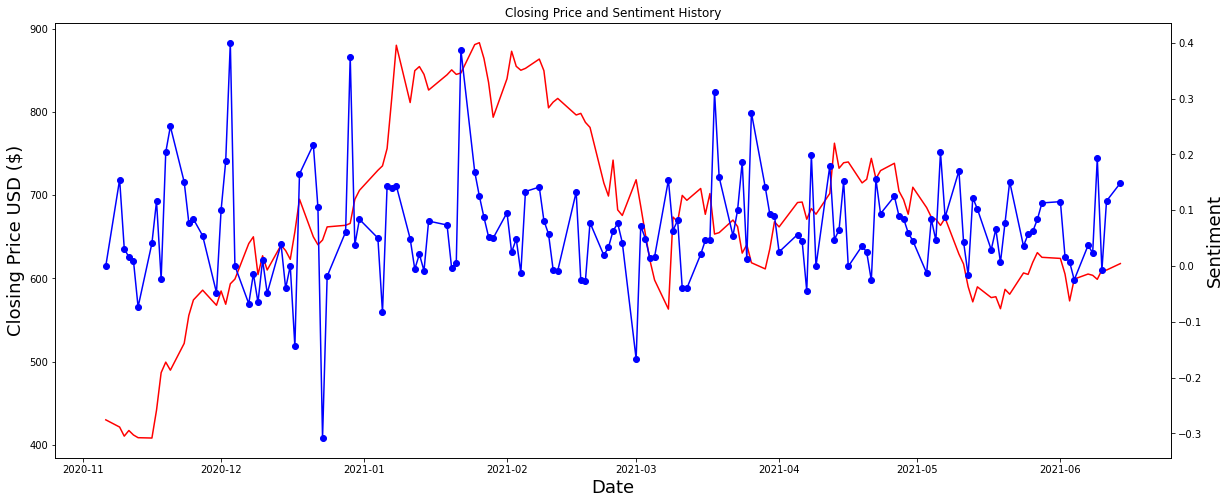

In [42]:
#Visualize The data
fig,ax = plt.subplots(figsize=(20, 8))

ax.set_title('Closing Price and Sentiment History')
l1 = ax.plot(df['Close'][-150:], color='red')
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Closing Price USD ($)',fontsize=18)
# ax.legend((l1, l2), ('Closing Price', 'Sentiment'), loc="upper left"

ax2=ax.twinx()
l2 = ax2.plot(df['sentiment'][-150:], color='Blue', marker="o")
ax2.set_xlabel('Date', fontsize=18)
ax2.set_ylabel('Sentiment',fontsize=18)
# ax2.legend((l1, l2), ('Closing Price', 'Sentiment'), loc="upper left")
# ax3=ax.twinx()          
# ax3.plot([2020-10, 2021-05], [0, 0], 'k-')

## Train-Test

In [43]:
X = df.filter(['Close', 'sentiment', 'subjectivity'])
y = df['Target']


training_data_len = math.ceil(len(X) * .8)

X_train = X.iloc[:training_data_len]
y_train = y.iloc[:training_data_len]
X_test = X.iloc[training_data_len -10:]
y_test = y.iloc[training_data_len:]


In [44]:
print('X_train:', len(X_train))
print('y_train:', len(y_train))
print('y_test:', len(y_test))

X_train: 403
y_train: 403
y_test: 100


In [45]:
training_data_len

403

In [46]:
len(X_train)

403

In [47]:
len(X_test)

110

## Scaling Data:

In [48]:
sx = MinMaxScaler(feature_range=(0,1))
sy = MinMaxScaler(feature_range=(0,1))

In [49]:
scaled_X_train = sx.fit_transform(X_train)
scaled_X_test = sx.transform(X_test)
scaled_y_train = sy.fit_transform(np.array(y_train).reshape(-1, 1))
scaled_y_test = sy.transform(np.array(y_test).reshape(-1, 1))


In [50]:
scaled_y_test.shape

(100, 1)

In [51]:
scaled_X_train.shape

(403, 3)

## TrainSet:

In [52]:
# Each Timestep uses window to predict the next value
window = 10
X = []
y = []

for i in range(window, len(X_train)):
    X.append(scaled_X_train[i-window:i,:])
    y.append(scaled_y_train[i])


In [53]:
X, y = np.array(X), np.array(y)

In [54]:
y.shape

(393, 1)

In [55]:
X.shape

(393, 10, 3)

In [56]:
#LSTM expects the data to be 3 dimensional. in order of number of samples, number of timesteps, and number of features
X = np.reshape(X, (X.shape[0], X.shape[1], 3))

In [57]:
X.shape

(393, 10, 3)

In [58]:
X.shape[0]

393

In [59]:
X.shape[1]

10

In [60]:
X.shape[2]

3

In [61]:
# Each Timestep uses window to predict the next value
window = 10
Xt = []
yt = scaled_y_test

for i in range(window, len(X_test)):
    Xt.append(scaled_X_test[i-window:i,:])
#     yt.append(scaled_y_test[i])


In [62]:
Xt, yt = np.array(Xt), np.array(yt)

In [63]:
#Reshape the data
#LSTM expects the data to be 3 dimensional. in order of number of samples, number of timesteps, and number of features

In [64]:
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 3))

In [65]:
Xt.shape

(100, 10, 3)

## Base Model:

In [66]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (X.shape[1], 3)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [67]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ["mean_absolute_percentage_error"])

history = model.fit(X, y, batch_size=1, 
                    epochs=100,
                    validation_data=(Xt, yt))

Epoch 1/100
393/393 [==============================] - 6s 9ms/step - loss: 0.0180 - mean_absolute_percentage_error: 124242.0289 - val_loss: 0.0123 - val_mean_absolute_percentage_error: 12.0993
Epoch 2/100
393/393 [==============================] - 2s 5ms/step - loss: 0.0033 - mean_absolute_percentage_error: 25849.8618 - val_loss: 0.0066 - val_mean_absolute_percentage_error: 8.6579
Epoch 3/100
393/393 [==============================] - 2s 6ms/step - loss: 0.0016 - mean_absolute_percentage_error: 28714.5282 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 5.7739
Epoch 4/100
393/393 [==============================] - 2s 5ms/step - loss: 0.0019 - mean_absolute_percentage_error: 135005.2339 - val_loss: 0.0050 - val_mean_absolute_percentage_error: 7.5131
Epoch 5/100
393/393 [==============================] - 2s 5ms/step - loss: 0.0015 - mean_absolute_percentage_error: 4824.1792 - val_loss: 0.0089 - val_mean_absolute_percentage_error: 10.2174
Epoch 6/100
393/393 [=====================

393/393 [==============================] - 2s 5ms/step - loss: 5.4691e-04 - mean_absolute_percentage_error: 10776.1271 - val_loss: 0.0039 - val_mean_absolute_percentage_error: 6.7978
Epoch 86/100
393/393 [==============================] - 2s 5ms/step - loss: 5.3662e-04 - mean_absolute_percentage_error: 4258.7463 - val_loss: 0.0066 - val_mean_absolute_percentage_error: 9.2207
Epoch 87/100
393/393 [==============================] - 2s 5ms/step - loss: 6.8119e-04 - mean_absolute_percentage_error: 3437.4678 - val_loss: 0.0053 - val_mean_absolute_percentage_error: 8.1156
Epoch 88/100
393/393 [==============================] - 2s 6ms/step - loss: 4.9466e-04 - mean_absolute_percentage_error: 2359.8681 - val_loss: 0.0095 - val_mean_absolute_percentage_error: 10.8264
Epoch 89/100
393/393 [==============================] - 2s 6ms/step - loss: 5.3939e-04 - mean_absolute_percentage_error: 5931.8784 - val_loss: 0.0070 - val_mean_absolute_percentage_error: 9.2522
Epoch 90/100
393/393 [==============

In [68]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

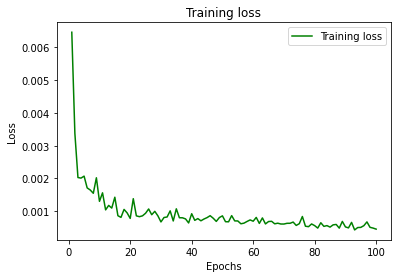

In [69]:
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

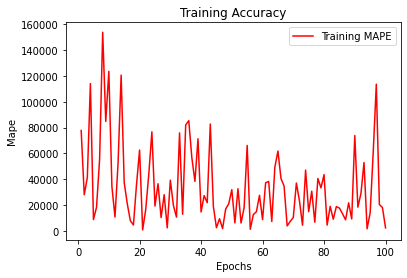

In [70]:
mape_values = history_dict["mean_absolute_percentage_error"] 

plt.plot(epochs, mape_values, 'r', label='Training MAPE')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Mape')
plt.legend()
plt.show()

In [71]:
#Get the model predicted Price values
predictions = model.predict(Xt)
predictions = sy.inverse_transform(predictions)
yt_unscaled = sy.inverse_transform(yt)

In [72]:
len(predictions)

100

In [73]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(((predictions - yt_unscaled) ** 2).mean())
print('RMSE:', rmse)

RMSE: 44.529748691470026


In [74]:
results_train = model.evaluate(X, y)
print(f'Training Loss: {results_train[0]:.3} \nTraining MAPE: {results_train[1]:.3}')

print('----------')

results_test = model.evaluate(Xt, yt)
print(f'Test Loss: {results_test[0]:.3} \nTest MAPE: {results_test[1]:.3}')
print('RMSE:', rmse)

13/13 [==============================] - 1s 3ms/step - loss: 4.5675e-04 - mean_absolute_percentage_error: 7134.2148
Training Loss: 0.000457 
Training MAPE: 7.13e+03
----------
4/4 [==============================] - 0s 3ms/step - loss: 0.0028 - mean_absolute_percentage_error: 5.4681
Test Loss: 0.00283 
Test MAPE: 5.47
RMSE: 44.529748691470026


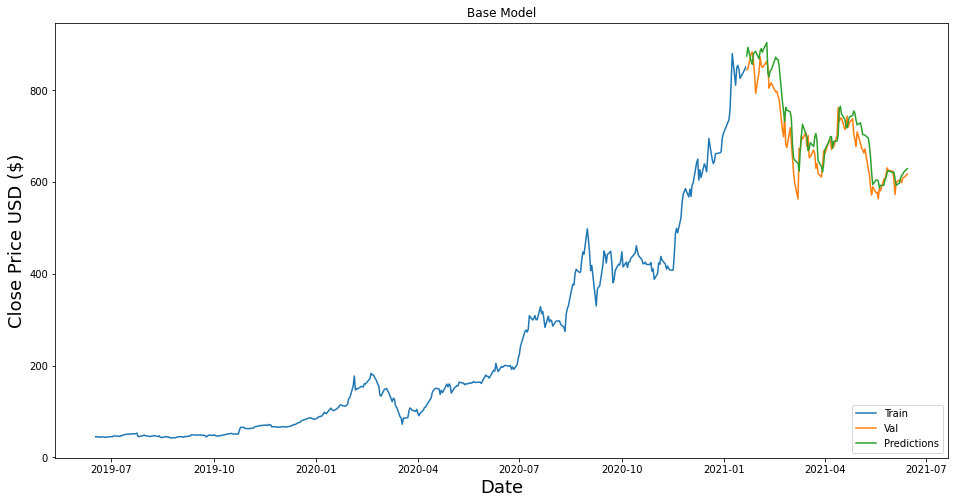

In [75]:
#plot the data
data = df.filter(['Close'])
train =data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize= (16, 8))
plt.title('Base Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [76]:
valid

Close  Predictions
Date                               
2021-01-21  844.989990   874.804443
2021-01-22  846.640015   893.748474
2021-01-25  880.799988   863.415894
2021-01-26  883.090027   856.698730
2021-01-27  864.159973   878.772034
...                ...          ...
2021-06-08  603.590027   609.124878
2021-06-09  598.780029   615.348022
2021-06-10  610.119995   617.470764
2021-06-11  609.890015   622.302185
2021-06-14  617.690002   629.458496

[100 rows x 2 columns]

## Final Model:

In [77]:
#Model Turning

model2 = Sequential()
model2.add(LSTM(100, return_sequences=True, input_shape= (X.shape[1], 3)))
model2.add(Dense(50))
model2.add(LSTM(100, return_sequences=False))
model2.add(Dense(50))
model2.add(Dense(25))
model2.add(Dense(1))

In [78]:
# compile the second model
model2.compile(optimizer='adam', 
               loss='mean_squared_error',
               metrics = ["mean_absolute_percentage_error"])

history2 = model2.fit(X, y, 
                    batch_size=20,
                    epochs=100,
                    validation_data=(Xt, yt))


Epoch 1/100
20/20 [==============================] - 5s 60ms/step - loss: 0.0604 - mean_absolute_percentage_error: 822785.5159 - val_loss: 0.0121 - val_mean_absolute_percentage_error: 12.1702
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0020 - mean_absolute_percentage_error: 55683.4448 - val_loss: 0.0157 - val_mean_absolute_percentage_error: 14.4266
Epoch 3/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0014 - mean_absolute_percentage_error: 17031.9677 - val_loss: 0.0109 - val_mean_absolute_percentage_error: 11.4898
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0011 - mean_absolute_percentage_error: 16201.7473 - val_loss: 0.0046 - val_mean_absolute_percentage_error: 7.1079
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0016 - mean_absolute_percentage_error: 23139.3212 - val_loss: 0.0055 - val_mean_absolute_percentage_error: 7.8365
Epoch 6/100
20/20 [===========================

Epoch 44/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0013 - mean_absolute_percentage_error: 15219.8856 - val_loss: 0.0052 - val_mean_absolute_percentage_error: 7.9538
Epoch 45/100
20/20 [==============================] - 0s 12ms/step - loss: 8.3270e-04 - mean_absolute_percentage_error: 18115.2810 - val_loss: 0.0040 - val_mean_absolute_percentage_error: 6.8265
Epoch 46/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0014 - mean_absolute_percentage_error: 4448.9610 - val_loss: 0.0112 - val_mean_absolute_percentage_error: 12.5855
Epoch 47/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0014 - mean_absolute_percentage_error: 9900.8138 - val_loss: 0.0067 - val_mean_absolute_percentage_error: 9.1968
Epoch 48/100
20/20 [==============================] - 0s 12ms/step - loss: 7.5040e-04 - mean_absolute_percentage_error: 9639.3257 - val_loss: 0.0039 - val_mean_absolute_percentage_error: 6.7947
Epoch 49/100
20/20 [===================

In [79]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

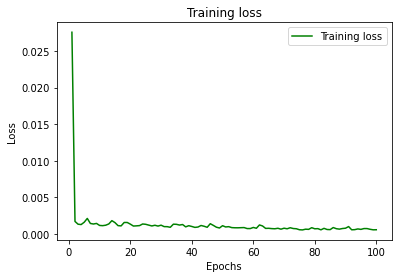

In [80]:
history_dict2 = history2.history
loss_values = history_dict2['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

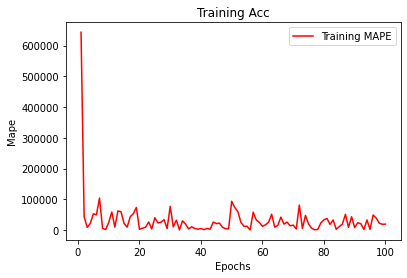

In [81]:
mape_values = history_dict2["mean_absolute_percentage_error"] 

plt.plot(epochs, mape_values, 'r', label='Training MAPE')
plt.title('Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Mape')
plt.legend()
plt.show()

In [82]:
#Get the model predicted Price values
predictions2 = model2.predict(Xt)
predictions2 = sy.inverse_transform(predictions2)
yt_unscaled2 = sy.inverse_transform(yt)

In [83]:
#Get the root mean squared error (Average value (y_hat - y_test))
rmse2 = np.sqrt(((predictions2 - yt_unscaled) ** 2).mean())
rmse2

56.84071939278607

In [84]:
results_train = model2.evaluate(X, y)
print(f'Training Loss: {results_train[0]:.3} \nTraining MAPE: {results_train[1]:.3}')

print('----------')

results_test = model2.evaluate(Xt, yt)
print(f'Test Loss: {results_test[0]:.3} \nTest MAPE: {results_test[1]:.3}')
print('RMSE:', rmse2)

13/13 [==============================] - 1s 3ms/step - loss: 5.1534e-04 - mean_absolute_percentage_error: 14930.0576
Training Loss: 0.000515 
Training MAPE: 1.49e+04
----------
4/4 [==============================] - 0s 4ms/step - loss: 0.0046 - mean_absolute_percentage_error: 7.4503
Test Loss: 0.0046 
Test MAPE: 7.45
RMSE: 56.84071939278607


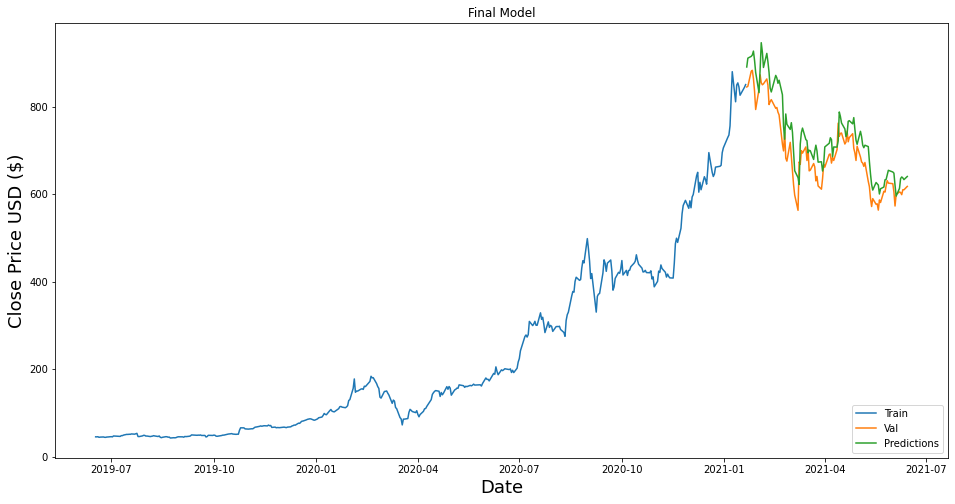

In [85]:
#plot the data
data = df.filter(['Close'])
train2 = data[:training_data_len]
valid2 = data[training_data_len:]
valid2['Predictions'] = predictions2
#Visualize the data
plt.figure(figsize= (16, 8))
plt.title('Final Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train2['Close'])
plt.plot(valid2[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [108]:
yt_pred = model2.predict(yt)

ValueError: in user code:

    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)


In [120]:
pred = model2.predict(Xt[0:3])
pred

array([[1.0128077],
       [1.0369754],
       [1.0417212]], dtype=float32)

In [122]:
pred2 = model2.predict(pred[0:1])

ValueError: in user code:

    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\eduar\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, None)


In [113]:
predictions3 = sy.inverse_transform(pred)
predictions3

array([[890.7496]], dtype=float32)

In [114]:
act = sy.inverse_transform(yt[0:1])
act

array([[846.64001465]])

In [86]:
print("My program took", time.time() - start_time, "to run")

My program took 418.95466780662537 to run
